In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## NMF for topic analysis

### Example

Let's look at users ratings of different movies. The ratings are from 1-5. A rating of 0 means the user watched the movie and hated it completely.

|       | Matrix | Alien | StarWars | Casablanca | Titanic |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     2 |        2 |          0 |      0 |
|   **Bob** |      3 |     5 |        5 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

Note that the first three movies (Matrix, Alien, StarWars) are Sci-fi movies and the last two (Casablanca, Titanic) are Romance. We will be able to mathematically pull out these topics!

In [33]:


## Alice Bob and Cindy all seem to like movies in space
## Emily Frank and Greg like romance movies in difficult circumstances. 
## And for some reason they like Alien too.


import pandas as pd
import numpy as np

M = np.array([[1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])



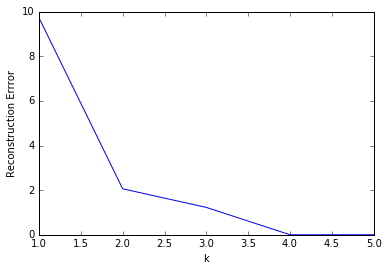

In [34]:
# Compute NMF
from sklearn.decomposition import NMF

# fit_nmf returns the reconstruction error and demonstrates how to find the matrices.  
def fit_nmf(k):
    # instantiate an nmf object. 
    nmf = NMF(n_components=k)
    nmf.fit(M)
    W = nmf.transform(M);
    H = nmf.components_;
    return nmf.reconstruction_err_
error = [fit_nmf(i) for i in range(1,6)]
plt.plot(range(1,6), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Errror')

In [48]:
# Fit using 3 hidden concepts
nmf = NMF(n_components=3)
nmf.fit(M)
W = nmf.transform(M);
H = nmf.components_;
print 'RSS = %.2f' % nmf.reconstruction_err_


RSS = 1.23


In [57]:
## To make things interpretable we have to label the rows and columns of the data matrix. 

# Make interpretable
movies = ['Matrix','Alien','StarWars','Casablanca','Titanic']
users = ['Alice','Bob','Cindy','Dan','Emily','Frank','Greg']
## np.around rounds to the given number of decimal places. In this case 2. 
W = np.around(W,2)
H = np.around(H,2)

## we take the dataframe W and index it with the users list. 

W = pd.DataFrame(W,index=users)

## we take the dataframe H and name the columns with the movies list. 
H = pd.DataFrame(H,columns=movies)

print W 
print H


          0     1     2
Alice  0.70  0.00  0.21
Bob    1.73  0.00  0.61
Cindy  1.29  0.00  0.76
Dan    1.62  0.00  0.95
Emily  0.39  1.84  0.00
Frank  0.00  2.28  0.00
Greg   0.20  0.92  0.00
   Matrix  Alien  StarWars  Casablanca  Titanic
0    0.00   3.02      1.85        0.00     0.00
1    0.00   0.20      0.00        2.19     2.19
2    5.21   0.00      2.31        0.00     0.00


In [51]:
# Verify reconstruction

## We take our two matrices and multiply them together. We may get some error from rounding. 
print np.around(W.dot(H),2)
print pd.DataFrame(M, index=users, columns=movies)

       Matrix  Alien  StarWars  Casablanca  Titanic
Alice    1.09   2.11      1.78        0.00     0.00
Bob      3.18   5.22      4.61        0.00     0.00
Cindy    3.96   3.90      4.14        0.00     0.00
Dan      4.95   4.89      5.19        0.00     0.00
Emily    0.00   1.55      0.72        4.03     4.03
Frank    0.00   0.46      0.00        4.99     4.99
Greg     0.00   0.79      0.37        2.01     2.01
       Matrix  Alien  StarWars  Casablanca  Titanic
Alice       1      2         2           0        0
Bob         3      5         5           0        0
Cindy       4      4         4           0        0
Dan         5      5         5           0        0
Emily       0      2         0           4        4
Frank       0      0         0           5        5
Greg        0      1         0           2        2


In [38]:
# Compare to SVD
from numpy.linalg import svd
r = 3

# Compute SVD
U, sigma, VT = svd(M)

# Make pretty

## round the values of the matrices
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
## add index
U = pd.DataFrame(U, index=users)
## ad columns
VT = pd.DataFrame(VT, columns=movies)

# Keep top two concepts
U = U.iloc[:,:r] ## truncate the columns of U.
sigma = sigma[:r] ## truncate the array of eigenvectors.
VT = VT.iloc[:r,:] ## truncate the rows of V. 

print U
print sigma
print VT

## The point of the output is that the preferences are negative and the weights of the movies
## are negative too. Not very interpretable. We might want to make these positive by hand. 

          0     1     2
Alice -0.21  0.02  0.31
Bob   -0.55  0.06  0.53
Cindy -0.50  0.07 -0.31
Dan   -0.62  0.08 -0.39
Emily -0.12 -0.60  0.40
Frank -0.04 -0.73 -0.42
Greg  -0.06 -0.30  0.20
[ 13.84   9.52   1.69]
   Matrix  Alien  StarWars  Casablanca  Titanic
0   -0.50  -0.62     -0.60       -0.06    -0.06
1    0.09  -0.05      0.11       -0.70    -0.70
2   -0.78   0.62      0.03       -0.07    -0.07


## Interpreting Concepts
#### Think of NMF like 'fuzzy clustering'
- The concepts are clusters
- Each row (document, user, etc...) can belong to more than one concept

#### Top Questions:
1. What do the concepts (clusters) mean?
2. To which concept(s) does each user/document belong?

#### What is concept 0?

In [59]:
# Top 2 movies in genre 0
top_movies = H.iloc[0].order(ascending=False).index[:2]
top_movies

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Index([u'Alien', u'StarWars'], dtype='object')

#### Which users align with concept 0?

In [40]:
# Top 2 users for genre 0
top_users = W.iloc[:,0].order(ascending=False).index[:2]
top_users    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Index([u'Bob', u'Dan'], dtype='object')

#### What concepts does Emily align with?

In [41]:
W.loc['Emily']

0    0.39
1    1.84
2    0.00
Name: Emily, dtype: float64

#### What are all the movies in each concept?

In [42]:
# Number of movies in each concept
thresh = .2  # movie is included if at least 20% of max weight
for g in range(3):
    all_movies = H.iloc[g,:]
    included = H.columns[all_movies >= (thresh * all_movies.max())]
    print "Concept %i contains: %s" % (g, ', '.join(included))

Concept 0 contains: Alien, StarWars
Concept 1 contains: Casablanca, Titanic
Concept 2 contains: Matrix, StarWars


#### Which users are associated with each concept?

In [43]:
# Users in each concept
thresh = .2  # movie is included if at least 20% of max weight
for g in range(3):
    all_users = W.iloc[:,g]
    included = W.index[all_users >= (thresh * all_users.max())]
    print "Concept %i contains: %s" % (g, ', '.join(included))

Concept 0 contains: Alice, Bob, Cindy, Dan, Emily
Concept 1 contains: Emily, Frank, Greg
Concept 2 contains: Alice, Bob, Cindy, Dan
